In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
plt.style.use('seaborn-v0_8-colorblind')
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf

In [2]:
data = pd.read_csv('data.csv')
data.head(20)

,Date and Hour,Date,StartHour,EndHour,Source,Production,dayOfYear,dayName,monthName
0,2020-07-22 20:00:00+02:00,7/22/2020,20:00:00,21:00:00,Solar,244.0,204,Wednesday,July
1,2020-07-23 07:00:00+02:00,7/23/2020,7:00:00,8:00:00,Solar,223.0,205,Thursday,July
2,2020-07-23 16:00:00+02:00,7/23/2020,16:00:00,17:00:00,Solar,2517.0,205,Thursday,July
3,2020-07-23 19:00:00+02:00,7/23/2020,19:00:00,20:00:00,Solar,658.0,205,Thursday,July
4,2020-07-23 23:00:00+02:00,7/23/2020,23:00:00,24:00:00,Solar,0.0,205,Thursday,July
5,2020-07-24 01:00:00+02:00,7/24/2020,1:00:00,2:00:00,Solar,0.0,206,Friday,July
6,2020-07-24 04:00:00+02:00,7/24/2020,4:00:00,5:00:00,Solar,0.0,206,Friday,July
7,2020-07-24 05:00:00+02:00,7/24/2020,5:00:00,6:00:00,Solar,0.0,206,Friday,July
8,2020-07-24 10:00:00+02:00,7/24/2020,10:00:00,11:00:00,Solar,2708.0,206,Friday,July
9,2020-07-24 14:00:00+02:00,7/24/2020,14:00:00,15:00:00,Solar,3851.0,206,Friday,July


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59806 entries, 0 to 59805
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date and Hour  59806 non-null  object 
 1   Date           59806 non-null  object 
 2   StartHour      59806 non-null  object 
 3   EndHour        59806 non-null  object 
 4   Source         59806 non-null  object 
 5   Production     59804 non-null  float64
 6   dayOfYear      59806 non-null  int64  
 7   dayName        59806 non-null  object 
 8   monthName      59806 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 4.1+ MB


## Pre-Processing

In [4]:
data.dropna(inplace=True)
data['Date and Hour'] = data['Date and Hour'].apply(lambda x: datetime.strptime(x[:-6], "%Y-%m-%d %H:%M:%S"))
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')

data.head()

,Date and Hour,Date,StartHour,EndHour,Source,Production,dayOfYear,dayName,monthName
0,2020-07-22 20:00:00,2020-07-22,20:00:00,21:00:00,Solar,244.0,204,Wednesday,July
1,2020-07-23 07:00:00,2020-07-23,7:00:00,8:00:00,Solar,223.0,205,Thursday,July
2,2020-07-23 16:00:00,2020-07-23,16:00:00,17:00:00,Solar,2517.0,205,Thursday,July
3,2020-07-23 19:00:00,2020-07-23,19:00:00,20:00:00,Solar,658.0,205,Thursday,July
4,2020-07-23 23:00:00,2020-07-23,23:00:00,24:00:00,Solar,0.0,205,Thursday,July


In [5]:
data['StartHourNum'] = data['Date and Hour'].apply(lambda x: x.hour)
data['Year'] = data['Date and Hour'].apply(lambda x: x.year)
data['MonthNum'] = data['Date and Hour'].apply(lambda x: x.month)
data['Week'] = data['Date and Hour'].apply(lambda x: x.week)
data['WeekOfDay'] = data['Date and Hour'].apply(lambda x: x.day_of_week)
data = data.set_index('Date and Hour')
data = data.sort_index()
data.head()

,Date,StartHour,EndHour,Source,Production,dayOfYear,dayName,monthName,StartHourNum,Year,MonthNum,Week,WeekOfDay
Date and Hour,,,,,,,,,,,,,
2020-01-01 00:00:00,2020-01-01,0:00:00,1:00:00,Solar,0.0,1,Wednesday,January,0,2020,1,1,2
2020-01-01 00:00:00,2020-01-01,0:00:00,1:00:00,Wind,3549.0,1,Wednesday,January,0,2020,1,1,2
2020-01-01 01:00:00,2020-01-01,1:00:00,2:00:00,Wind,2952.0,1,Wednesday,January,1,2020,1,1,2
2020-01-01 01:00:00,2020-01-01,1:00:00,2:00:00,Solar,0.0,1,Wednesday,January,1,2020,1,1,2
2020-01-01 02:00:00,2020-01-01,2:00:00,3:00:00,Wind,2722.0,1,Wednesday,January,2,2020,1,1,2


## Check for stationarity
- Using Dickey-Fuller test 
- There is stationarity in both wind energy as well as solar energy

In [6]:
from statsmodels.tsa.stattools import adfuller

Wind_data = data[data['Source'] == 'Wind']['Production'].sort_index().to_numpy()
Solar_data = data[data['Source'] == 'Solar']['Production'].sort_index().to_numpy()

adf, pval, usedlag, nobs, crit_vals, icbest =  adfuller(Wind_data)
print('-'*25 + 'Wind Energy test' + '-'*25)
print('ADF test statistic:', adf)
print('ADF p-values:', pval)
print('ADF number of lags used:', usedlag)
print('ADF number of observations:', nobs)
print('ADF critical values:', crit_vals)
print('ADF best information criterion:', icbest)

adf, pval, usedlag, nobs, crit_vals, icbest =  adfuller(Solar_data)
print("\n"+'-'*25 + 'Solar Energy test' + '-'*25)
print('ADF test statistic:', adf)
print('ADF p-values:', pval)
print('ADF number of lags used:', usedlag)
print('ADF number of observations:', nobs)
print('ADF critical values:', crit_vals)
print('ADF best information criterion:', icbest)

-------------------------Wind Energy test-------------------------
ADF test statistic: -13.463083524411294
ADF p-values: 3.498866462078949e-25
ADF number of lags used: 50
ADF number of observations: 29852
ADF critical values: {'1%': np.float64(-3.4305690761890832), '5%': np.float64(-2.8616368257362312), '10%': np.float64(-2.5668215373876975)}
ADF best information criterion: 420285.90680876677

-------------------------Solar Energy test-------------------------
ADF test statistic: -6.78639908939299
ADF p-values: 2.4259805369155517e-09
ADF number of lags used: 50
ADF number of observations: 29850
ADF critical values: {'1%': np.float64(-3.4305690908688176), '5%': np.float64(-2.8616368322240366), '10%': np.float64(-2.566821540841)}
ADF best information criterion: 362015.14305444167


# Visulalisation

## Line Charts

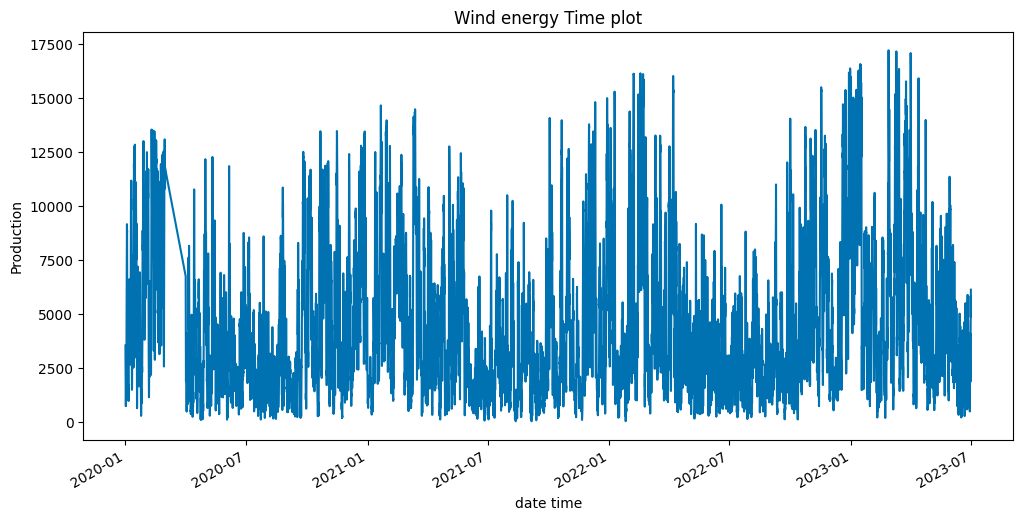

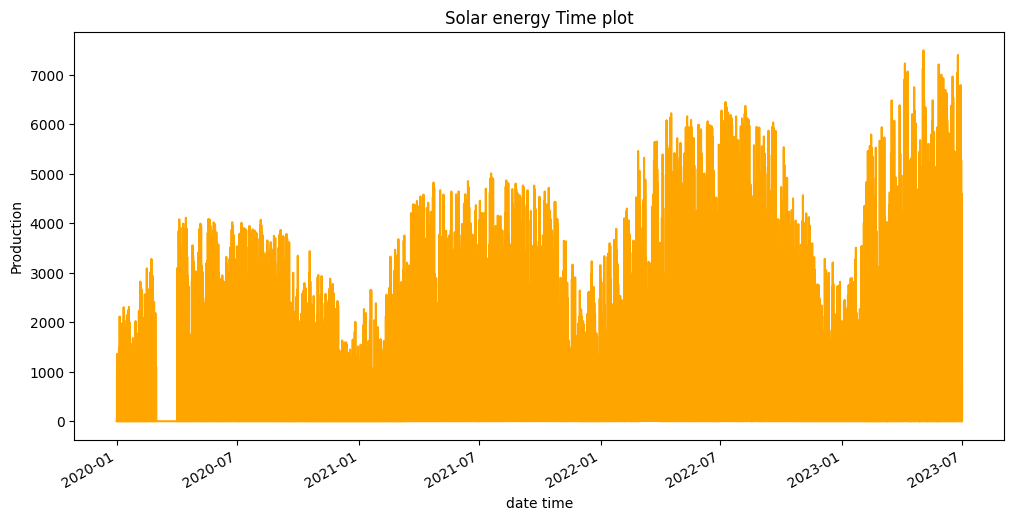

In [7]:
# plt.style.use('seaborn-v0_8')

plt.figure(figsize=(15, 8))
data[data['Source'] == 'Wind']['Production'].plot(title='Wind energy Time plot', figsize=(12, 6), xlabel='date time', ylabel='Production')
plt.show()
plt.figure(figsize=(15, 3))
data[data['Source'] == 'Solar']['Production'].plot(title='Solar energy Time plot', color='orange', figsize=(12, 6), xlabel='date time', ylabel='Production')
plt.show()

- In wind and solar energy production have seasonality
- In solar energy production there is increasing trend.

<Axes: xlabel='Date and Hour'>

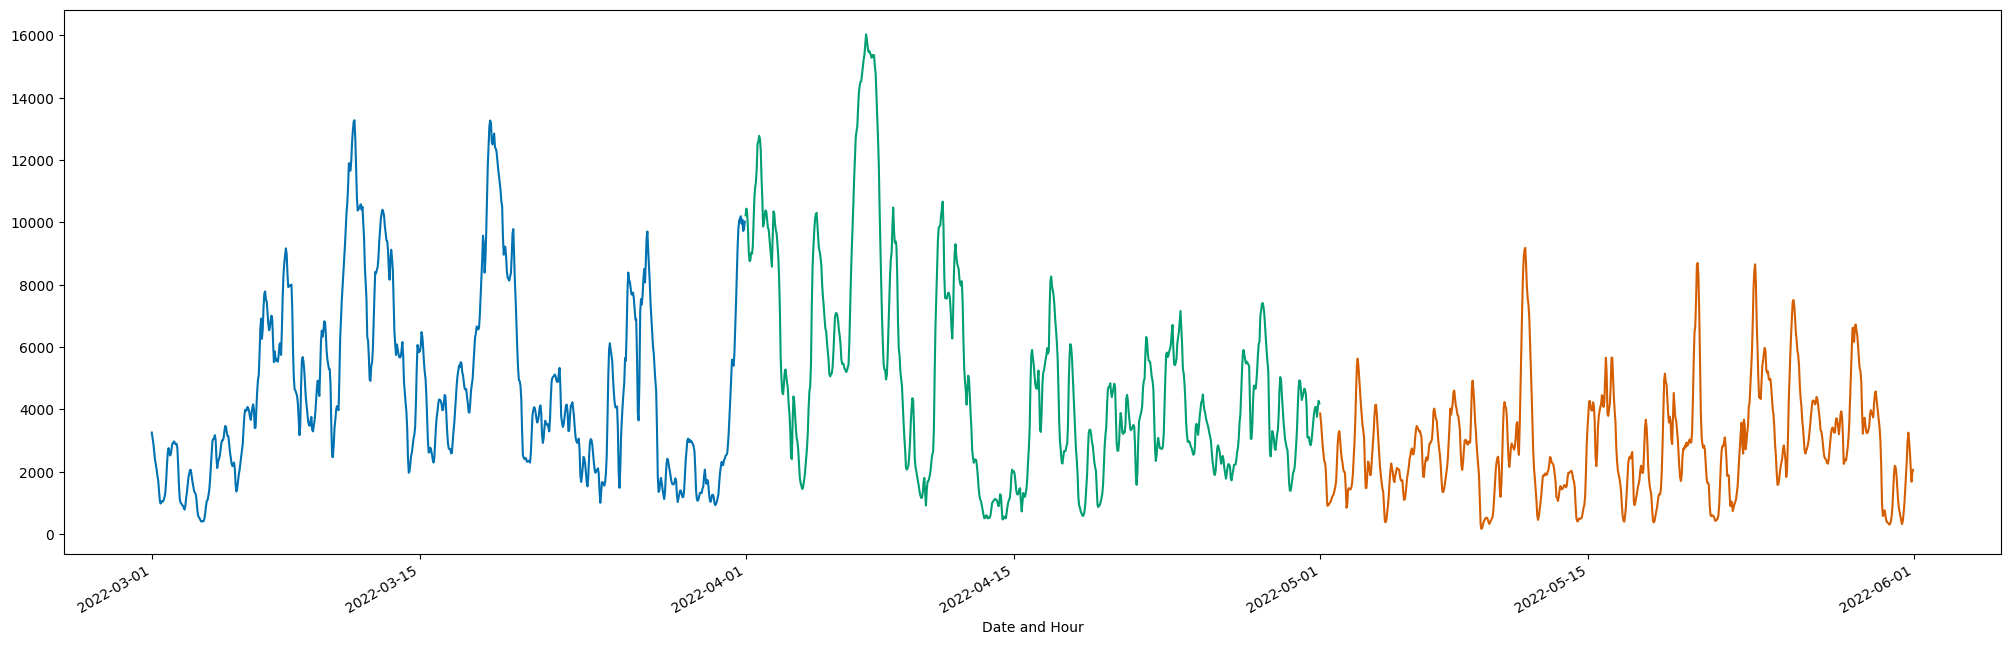

In [29]:
plt.figure(figsize=(25, 8))
data[(data['Year'] == 2022) & (data['Source'] == 'Wind') & (data['MonthNum'] == 3)]['Production'].sort_index().plot()

data[(data['Year'] == 2022) & (data['Source'] == 'Wind') & (data['MonthNum'] == 4)]['Production'].sort_index().plot()


data[(data['Year'] == 2022) & (data['Source'] == 'Wind') & (data['MonthNum'] == 5)]['Production'].sort_index().plot()


## Seasonal Plot

### Yearly Seasonal plot

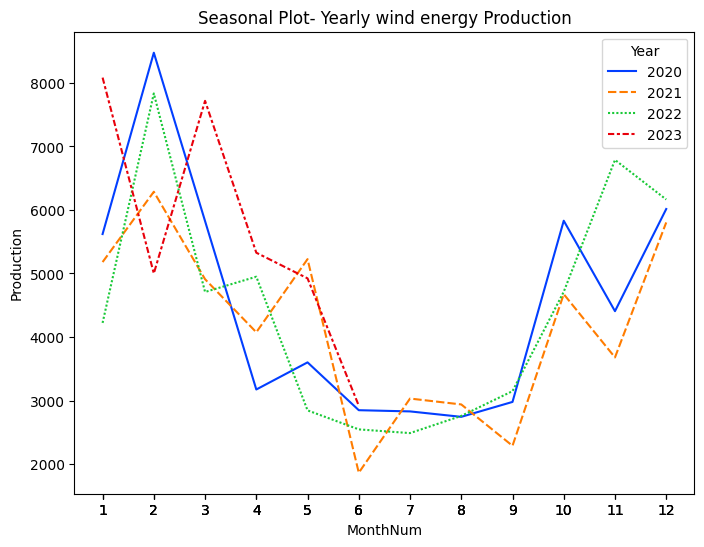

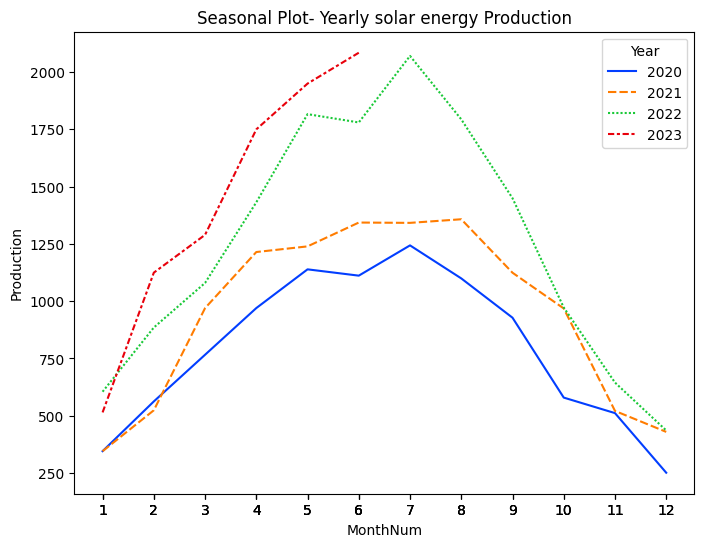

In [8]:
df_plot_wind = data[data['Source'] == 'Wind'][['Production', 'MonthNum', 'Year']].groupby(['MonthNum', 'Year']).mean().reset_index()
df_plot_solar = data[data['Source'] == 'Solar'][['Production', 'MonthNum', 'Year']].groupby(['MonthNum', 'Year']).mean().reset_index()

plt.figure(figsize=(8,6))
ax1 = sns.lineplot(df_plot_wind, x='MonthNum', y='Production', hue='Year', style="Year", palette='bright')
plt.title('Seasonal Plot- Yearly wind energy Production')
plt.xlabel('MonthNum')
plt.ylabel('Production')
ax1.set(xticks=df_plot_wind['MonthNum'])
plt.show()

plt.figure(figsize=(8,6))
ax2 = sns.lineplot(df_plot_solar, x='MonthNum', y='Production', hue='Year', style="Year", palette='bright')
plt.title('Seasonal Plot- Yearly solar energy Production')
plt.xlabel('MonthNum')
plt.ylabel('Production')
ax2.set(xticks=df_plot_solar['MonthNum'])
plt.show()

- In case of Wind energy production, production decresed in between 6th to 8th month 
- In case of Solar energy generation, production peaks in btween 6th to 8th month the decreased

### Weekly Seasonal Plot

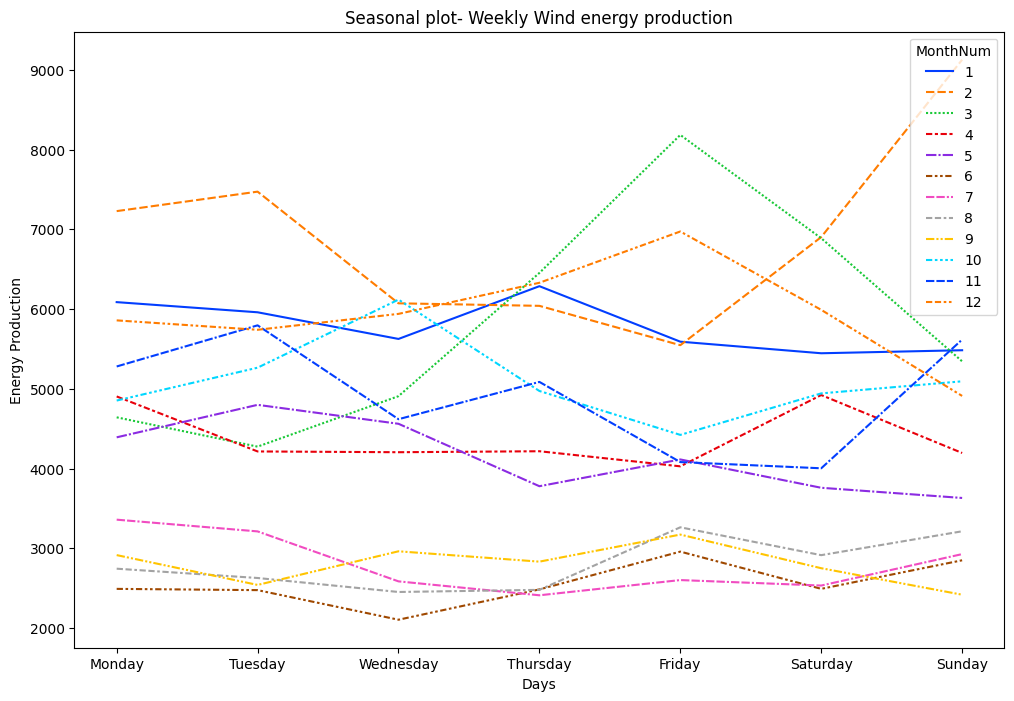

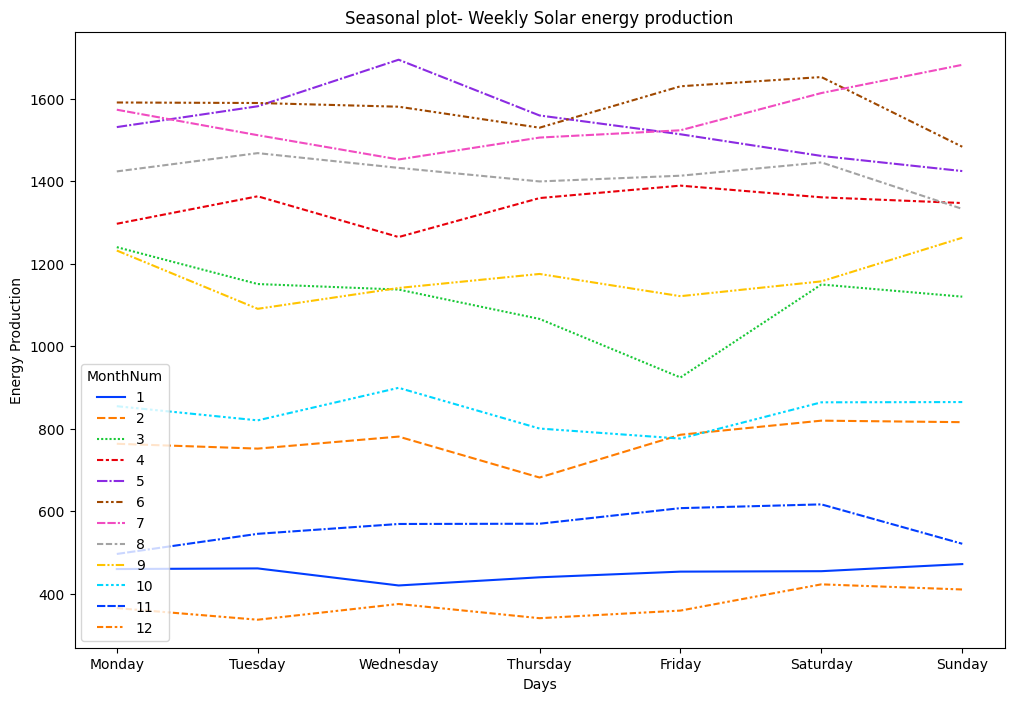

In [9]:
df_plot_wind = data[data['Source'] == 'Wind'][['WeekOfDay', 'MonthNum', 'Production', 'dayName']].groupby(['WeekOfDay', 'MonthNum', 'dayName']).mean().reset_index()
df_plot_solar = data[data['Source'] == 'Solar'][['WeekOfDay', 'MonthNum', 'Production', 'dayName']].groupby(['WeekOfDay', 'MonthNum', 'dayName']).mean().reset_index()

plt.figure(figsize=(12,8))
sns.lineplot(data=df_plot_wind, x='dayName', y='Production', hue='MonthNum',style="MonthNum", palette="bright")
plt.title("Seasonal plot- Weekly Wind energy production")
plt.xlabel('Days')
plt.ylabel('Energy Production')
sns.move_legend(plt.gca(), "upper right")
# plt.xticks(rotation=45)



plt.figure(figsize=(12,8))
sns.lineplot(data=df_plot_solar, x='dayName', y='Production', hue='MonthNum', style="MonthNum", palette='bright' , legend='brief') #  palette="bright"
plt.title("Seasonal plot- Weekly Solar energy production")
plt.xlabel('Days')
plt.ylabel('Energy Production')
sns.move_legend(plt.gca(), "lower left")

# plt.xticks(rotation=45)

The change in production is not seasonal w.r.t week day. It depends more on months

### Daily Seasonal Plot

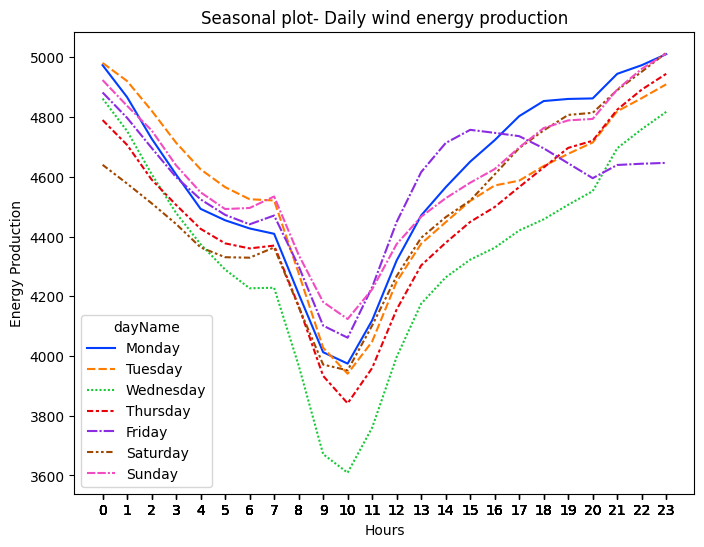

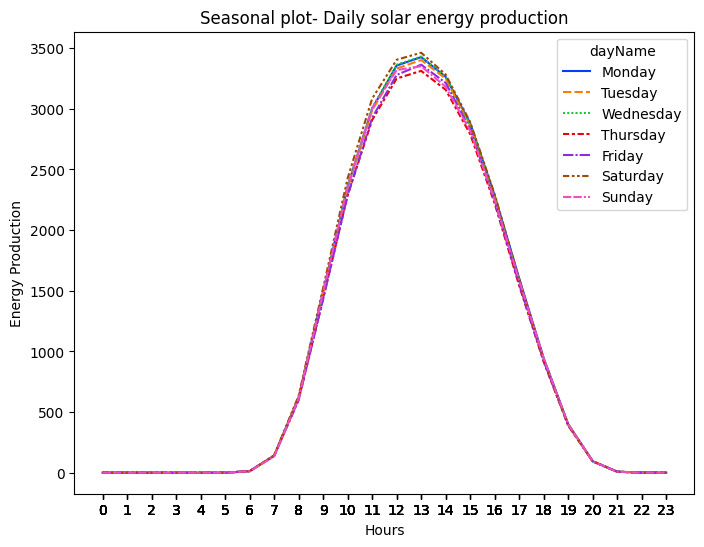

In [10]:
df_plot_wind = data[data['Source'] == 'Wind'][['StartHourNum','WeekOfDay', 'dayName','Production' ]].groupby(['StartHourNum', 'WeekOfDay', 'dayName']).mean().reset_index()
df_plot_solar = data[data['Source'] == 'Solar'][['StartHourNum','WeekOfDay', 'dayName','Production' ]].groupby(['StartHourNum', 'WeekOfDay', 'dayName']).mean().reset_index()

plt.figure(figsize=(8, 6))
plt.title("Seasonal plot- Daily wind energy production")
ax1 = sns.lineplot(data=df_plot_wind, x='StartHourNum', y='Production', hue='dayName',style="dayName", palette="bright")
plt.xlabel("Hours")
plt.ylabel("Energy Production")
ax1.set(xticks=df_plot_wind['StartHourNum'])

plt.figure(figsize=(8, 6))
plt.title("Seasonal plot- Daily solar energy production")
ax2 = sns.lineplot(data=df_plot_solar, x='StartHourNum', y='Production', hue='dayName',style="dayName", palette="bright")
plt.xlabel("Hours")
plt.ylabel("Energy Production")
ax2.set(xticks=df_plot_solar['StartHourNum'])

plt.show()


- In case of wind production, energy production touches its lower peak between 8 to 12 o'clock.
- In contrast solar, energy production is at peak between 12 to 14 o'clock.

**Yearly** 
- No clear yearly changes in wind energy production.
- Solar energy production shows yearly increasing trend. 
**Monthly**
- wind energy production is lowers during 6, 7, 8 and 9 month
- solar energy production is lowest during 1, 2, 10, 11, 12 month

**weekly**
- On comparing week days energy production doesn't follow any trend or seasonality

**Daily**
- For wind energy, production is lowest between 8 to 11 (24 hour)
- For solar energy, production is highest between 12 to 15 (24 hour).

## Box Plot


### Complete Box plot

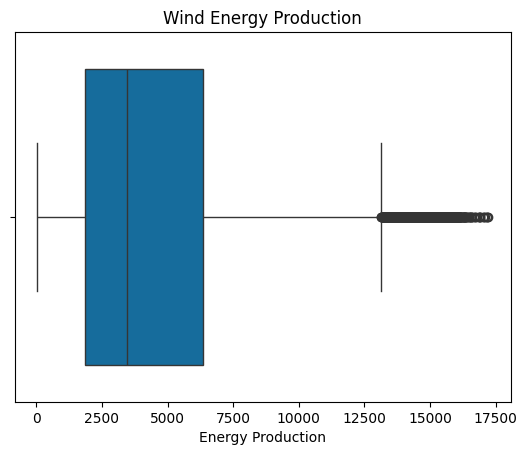

Text(0.5, 0, 'Energy Production')

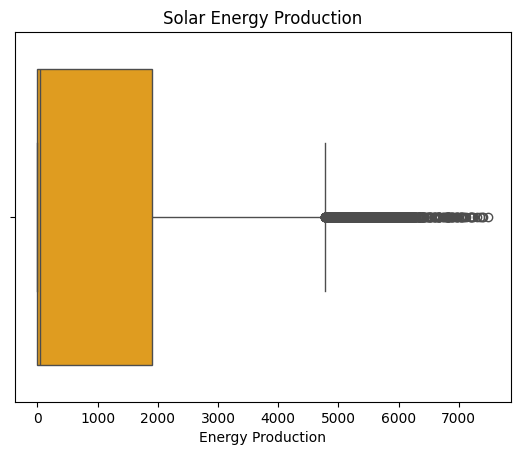

In [11]:
df_wind = data[data['Source'] == 'Wind']['Production']
df_solar = data[data['Source'] == 'Solar']['Production']

# plt.figure(figsize=(8, 6))
sns.boxplot(df_wind, orient='h')
plt.title("Wind Energy Production")
plt.xlabel('Energy Production')
plt.show()

# plt.figure(figsize=(5, 4))
sns.boxplot(df_solar, orient='h', color='orange')
plt.title("Solar Energy Production")
plt.xlabel('Energy Production')

### Monthly Box plot

In [12]:
plt.figure(figsize=(16, 6))
df_wind = data[data['Source'] == 'Wind']
df_wind = df_wind.set_index('Date and Hour')

df_wind['year_month'] = [str(x.year) + '_' + str(x.month) for x in df_wind.index]

df_plot = df_wind.reset_index().sort_values(by='Date and Hour').set_index('Date and Hour')
plt.title(f'Boxplot Year Month Distribution- Wind energy');
plt.xticks(rotation=90)
plt.xlabel('Year Month')
plt.ylabel('Energy')

sns.boxplot(x='year_month', y='Production', data=df_plot)
plt.ylabel('Production')
plt.xlabel('Year Month')
plt.show()


plt.figure(figsize=(16, 6))
df_wind = data[data['Source'] == 'Solar']
df_wind = df_wind.set_index('Date and Hour')

df_wind['year_month'] = [str(x.year) + '_' + str(x.month) for x in df_wind.index]

df_plot = df_wind[df_wind['Year'] >= 2019].reset_index().sort_values(by='Date and Hour').set_index('Date and Hour')
plt.title(f'Boxplot Year Month Distribution Solar energy');
plt.xticks(rotation=90)
plt.xlabel('Year Month')
plt.ylabel('Energy')

sns.boxplot(x='year_month', y='Production', data=df_plot, color="orange")
plt.ylabel('Production')
plt.xlabel('Year Month')
plt.show()


KeyError: "None of ['Date and Hour'] are in the columns"

<Figure size 1600x600 with 0 Axes>

### Weekly Boxplot

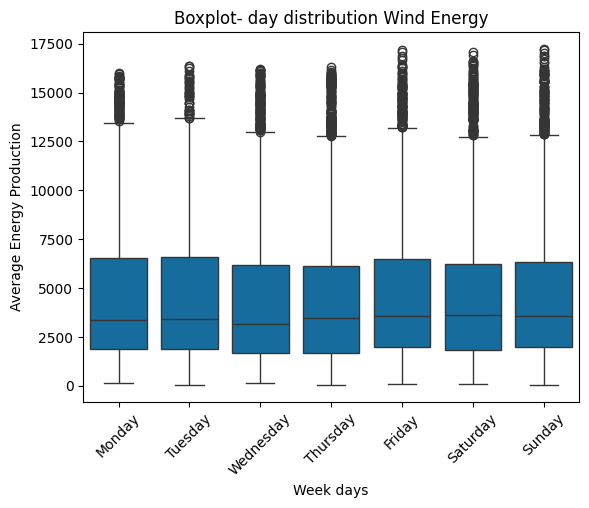

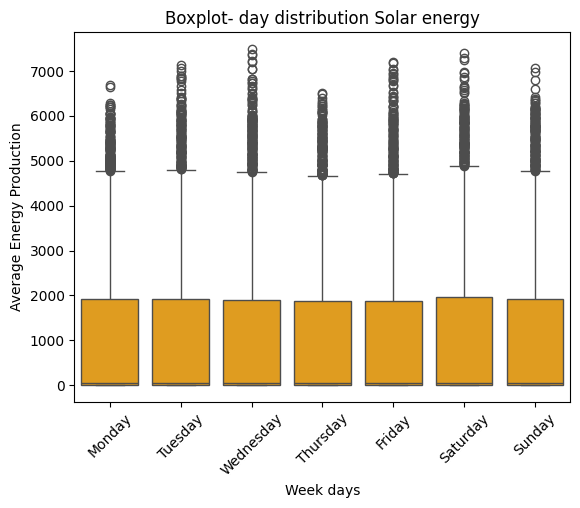

In [13]:
df_plot_wind = data[data['Source'] == 'Wind'][['WeekOfDay', 'Production', 'dayName']].sort_values(by='WeekOfDay')
sns.boxplot(df_plot_wind, x='dayName', y='Production')
plt.xlabel('Week days')
plt.ylabel('Average Energy Production')
plt.xticks(rotation=45)
plt.title("Boxplot- day distribution Wind Energy")
plt.show()

df_plot_solar = data[data['Source'] == 'Solar'][['WeekOfDay', 'Production', 'dayName']].sort_values(by='WeekOfDay')
sns.boxplot(df_plot_solar, x='dayName', y='Production', color="orange")
plt.xlabel('Week days')
plt.ylabel('Average Energy Production')
plt.xticks(rotation=45)
plt.title("Boxplot- day distribution Solar energy")
plt.show()

### Daily Boxplot

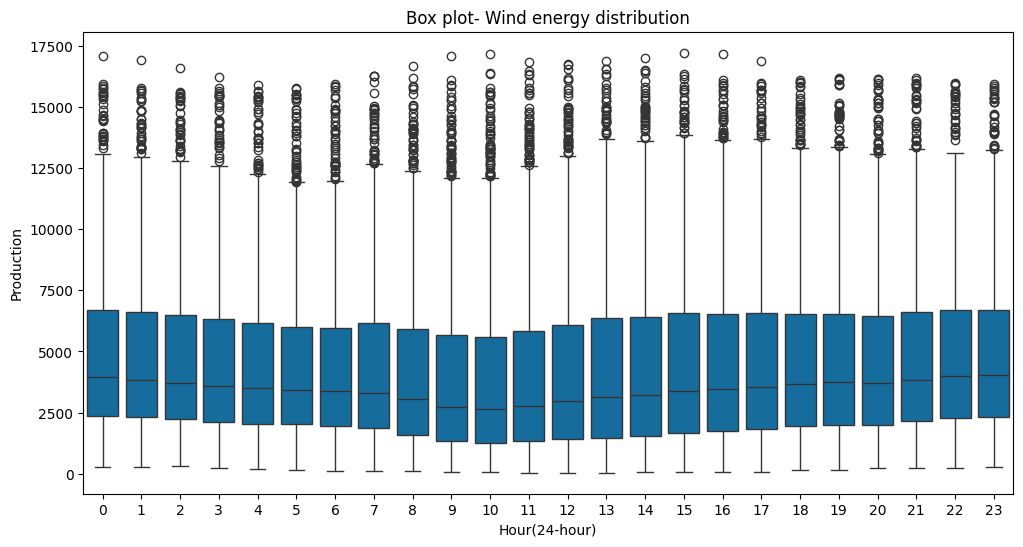

Text(0.5, 0, 'Hour(24-hour)')

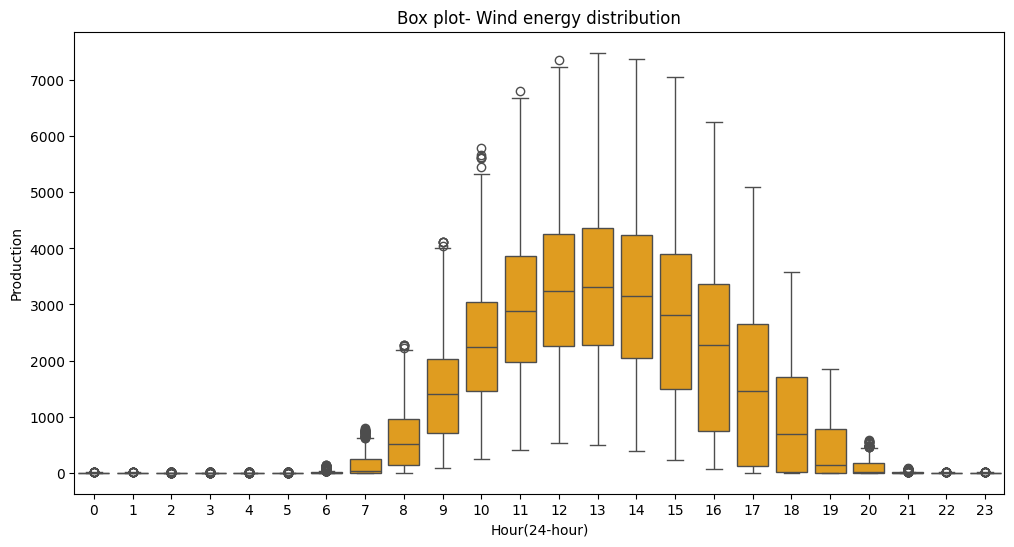

In [14]:
df_plot_wind = data[data['Source'] == 'Wind'][['StartHourNum', 'Production']].sort_values(by='StartHourNum')
df_plot_solar = data[data['Source'] == 'Solar'][['StartHourNum', 'Production']].sort_values(by='StartHourNum')

plt.figure(figsize=(12, 6))
sns.boxplot(df_plot_wind, x='StartHourNum', y='Production')
plt.title('Box plot- Wind energy distribution')
plt.xlabel('Hour(24-hour)')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(df_plot_solar, x='StartHourNum', y='Production', color="orange")
plt.title('Box plot- Wind energy distribution')
plt.xlabel('Hour(24-hour)')

## Time series decomposition

Addtive

$$ y_t = S_t + T_t + R_t$$

Multiplicative

$$ y_t = S_t * T_t * R_t$$

### Time Series complete

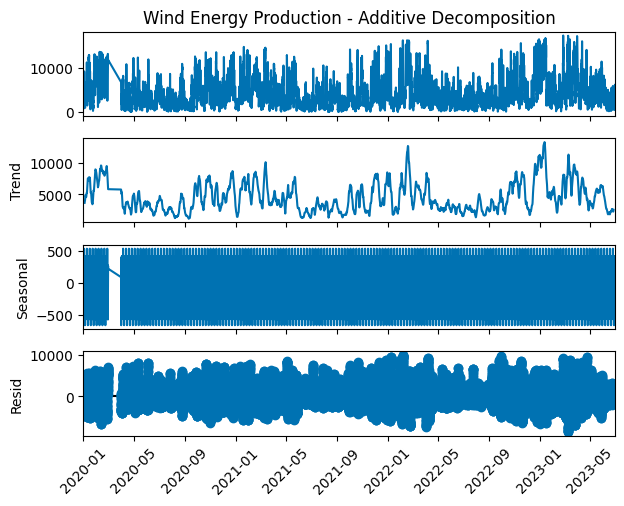

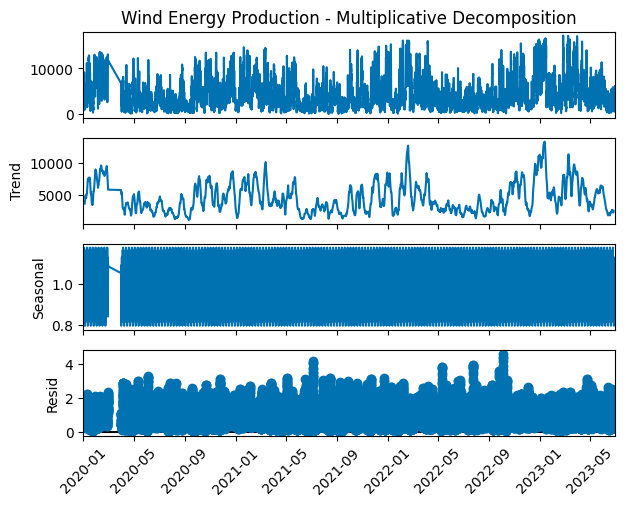

In [15]:
df_plot_wind = data[data['Source'] == 'Wind'].reset_index()
df_plot_wind = df_plot_wind.drop_duplicates(subset=['Date and Hour']).sort_values(by='Date and Hour')
df_plot_wind = df_plot_wind.set_index('Date and Hour')

df_plot_wind['Wind Energy Production - Additive Decomposition'] = df_plot_wind['Production']
df_plot_wind['Wind Energy Production - Multiplicative Decomposition'] = df_plot_wind['Production']

res_wind_add = seasonal_decompose(df_plot_wind['Wind Energy Production - Additive Decomposition'], model='additive', period=24*7) 
res_wind_mul = seasonal_decompose(df_plot_wind['Wind Energy Production - Multiplicative Decomposition'], model='multiplicative', period=24*7) 

res_wind_add.plot().suptitle('')
plt.xticks(rotation=45)
plt.show()
res_wind_mul.plot()
plt.xticks(rotation=45)
plt.show()


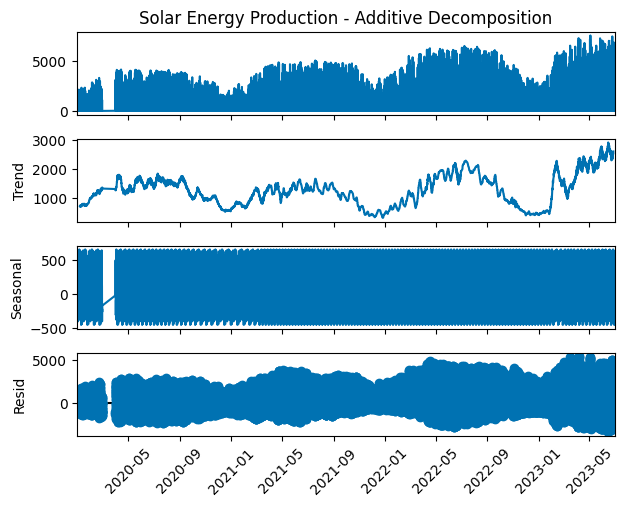

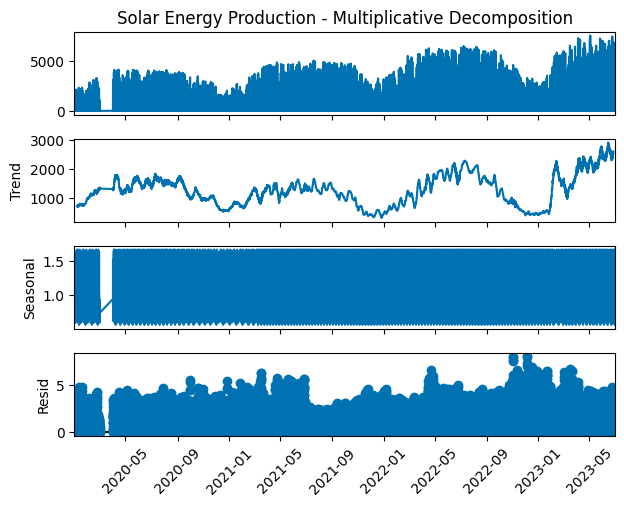

In [16]:
df_plot_solar = data[(data['Source'] == 'Solar') & (data['Production'] > 0)].reset_index()
df_plot_solar = df_plot_solar.drop_duplicates(subset=['Date and Hour']).sort_values(by='Date and Hour')
df_plot_solar = df_plot_solar.set_index('Date and Hour')

df_plot_solar['Solar Energy Production - Additive Decomposition'] = df_plot_solar['Production']
df_plot_solar['Solar Energy Production - Multiplicative Decomposition'] = df_plot_solar['Production']

res_solar_add = seasonal_decompose(df_plot_solar['Solar Energy Production - Additive Decomposition'], model='additive', period=24*7) 
res_solar_mul = seasonal_decompose(df_plot_solar['Solar Energy Production - Multiplicative Decomposition'], model='multiplicative', period=24*7) 

res_solar_add.plot()
plt.xticks(rotation=45)
plt.show()
res_solar_mul.plot()
plt.xticks(rotation=45)
plt.show()

### Time series year 2022

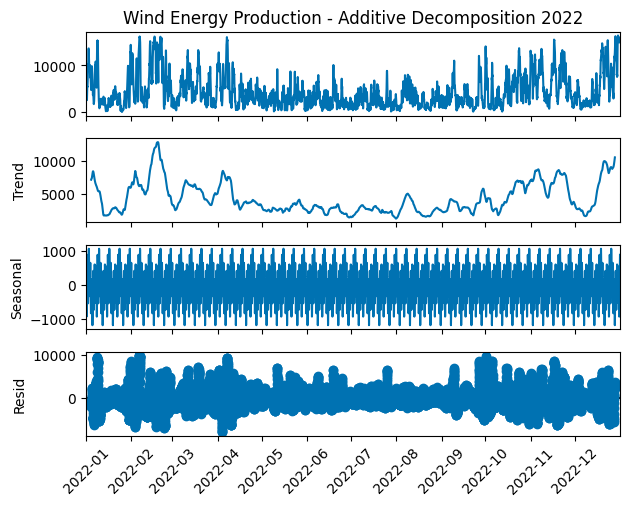

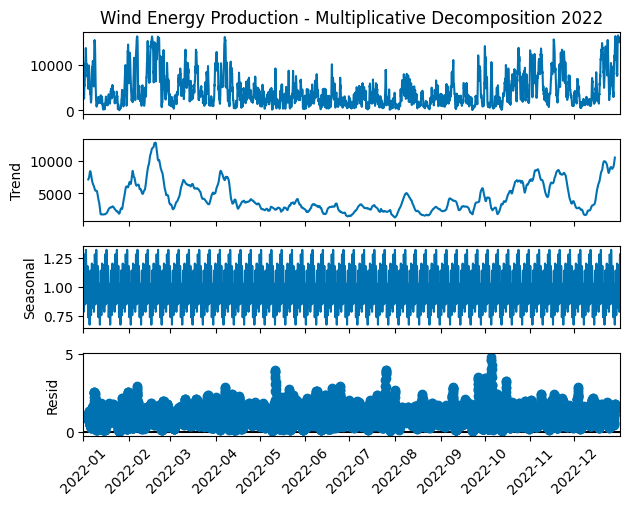

In [17]:
df_plot_wind = data[(data['Source'] == 'Wind') & (data['Year'] == 2022)].reset_index()
df_plot_wind = df_plot_wind.drop_duplicates(subset=['Date and Hour']).sort_values(by='Date and Hour')
df_plot_wind = df_plot_wind.set_index('Date and Hour')

df_plot_wind['Wind Energy Production - Additive Decomposition 2022'] = df_plot_wind['Production']
df_plot_wind['Wind Energy Production - Multiplicative Decomposition 2022'] = df_plot_wind['Production']

res_wind_add = seasonal_decompose(df_plot_wind['Wind Energy Production - Additive Decomposition 2022'], model='additive', period=24*7) 
res_wind_mul = seasonal_decompose(df_plot_wind['Wind Energy Production - Multiplicative Decomposition 2022'], model='multiplicative', period=24*7) 

res_wind_add.plot().suptitle('')
plt.xticks(rotation=45)
plt.show()
res_wind_mul.plot()
plt.xticks(rotation=45)
plt.show()

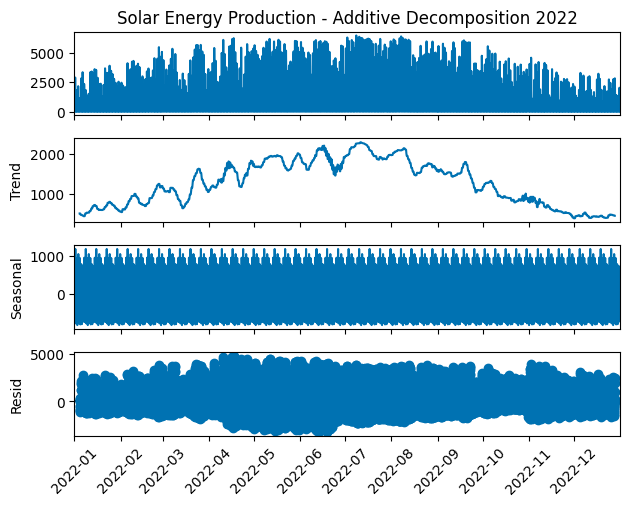

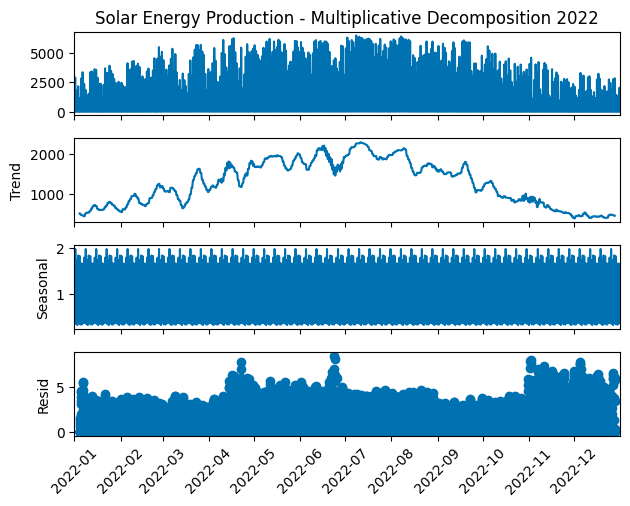

In [18]:
df_plot_solar = data[(data['Source'] == 'Solar') & (data['Production'] > 0) & (data['Year'] == 2022)].reset_index()
df_plot_solar = df_plot_solar.drop_duplicates(subset=['Date and Hour']).sort_values(by='Date and Hour')
df_plot_solar = df_plot_solar.set_index('Date and Hour')

df_plot_solar['Solar Energy Production - Additive Decomposition 2022'] = df_plot_solar['Production']
df_plot_solar['Solar Energy Production - Multiplicative Decomposition 2022'] = df_plot_solar['Production']

res_solar_add = seasonal_decompose(df_plot_solar['Solar Energy Production - Additive Decomposition 2022'], model='additive', period=24*7) 
res_solar_mul = seasonal_decompose(df_plot_solar['Solar Energy Production - Multiplicative Decomposition 2022'], model='multiplicative', period=24*7) 

res_solar_add.plot().suptitle('')
plt.xticks(rotation=45)
plt.show()
res_solar_mul.plot()
plt.xticks(rotation=45)
plt.show()

### Decomposition Jan 2022

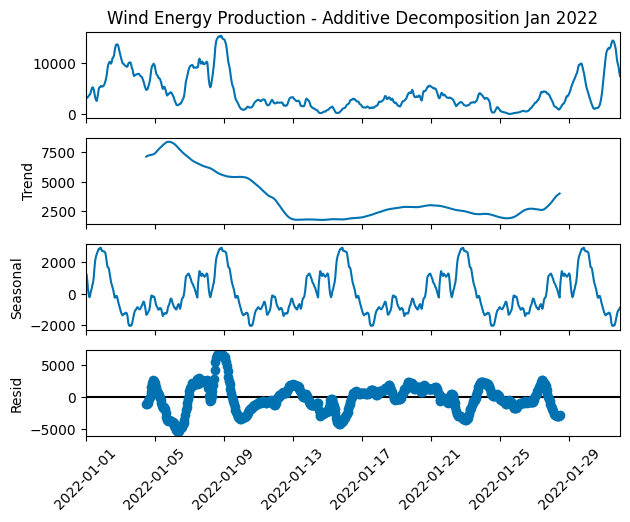

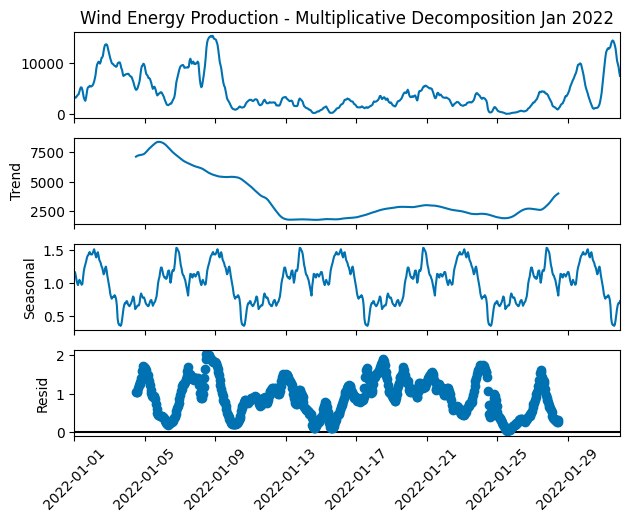

In [19]:
df_plot_wind = data[(data['Source'] == 'Wind') & (data['Year'] == 2022)].reset_index()
df_plot_wind = df_plot_wind[(df_plot_wind['MonthNum'] == 1)]
df_plot_wind = df_plot_wind.drop_duplicates(subset=['Date and Hour']).sort_values(by='Date and Hour')
df_plot_wind = df_plot_wind.set_index('Date and Hour')

df_plot_wind['Wind Energy Production - Additive Decomposition Jan 2022'] = df_plot_wind['Production']
df_plot_wind['Wind Energy Production - Multiplicative Decomposition Jan 2022'] = df_plot_wind['Production']

res_wind_add = seasonal_decompose(df_plot_wind['Wind Energy Production - Additive Decomposition Jan 2022'], model='additive', period=24*7) 
res_wind_mul = seasonal_decompose(df_plot_wind['Wind Energy Production - Multiplicative Decomposition Jan 2022'], model='multiplicative', period=24*7) 

res_wind_add.plot().suptitle('')
plt.xticks(rotation=45)
plt.show()
res_wind_mul.plot()
plt.xticks(rotation=45)
plt.show()

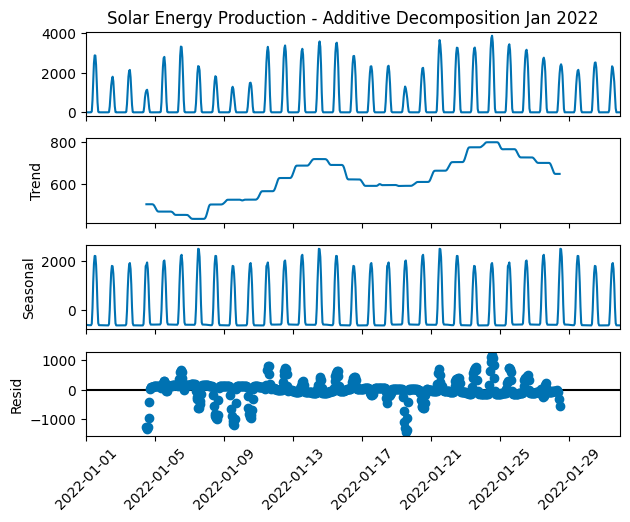

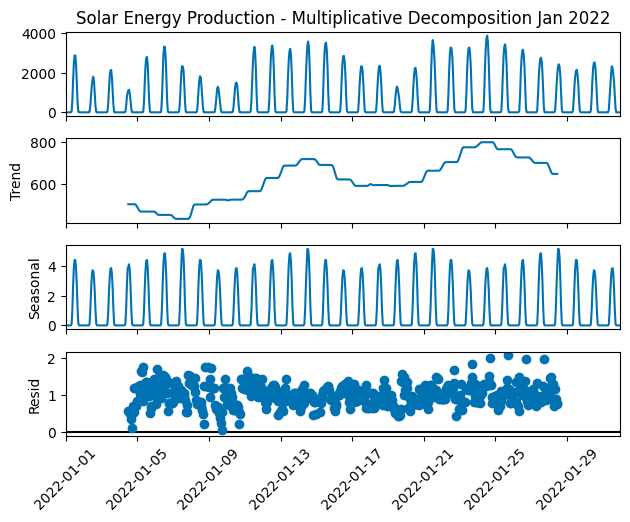

In [20]:
df_plot_solar = data[(data['Source'] == 'Solar') & (data['Production'] > 0) & (data['Year'] == 2022)].reset_index()
df_plot_solar = df_plot_solar[df_plot_solar['MonthNum'] == 1]
df_plot_solar = df_plot_solar.drop_duplicates(subset=['Date and Hour']).sort_values(by='Date and Hour')
df_plot_solar = df_plot_solar.set_index('Date and Hour')

df_plot_solar['Solar Energy Production - Additive Decomposition Jan 2022'] = df_plot_solar['Production']
df_plot_solar['Solar Energy Production - Multiplicative Decomposition Jan 2022'] = df_plot_solar['Production']

res_solar_add = seasonal_decompose(df_plot_solar['Solar Energy Production - Additive Decomposition Jan 2022'], model='additive', period=24*7) 
res_solar_mul = seasonal_decompose(df_plot_solar['Solar Energy Production - Multiplicative Decomposition Jan 2022'], model='multiplicative', period=24*7) 

res_solar_add.plot().suptitle('')
plt.xticks(rotation=45)
plt.show()
res_solar_mul.plot()
plt.xticks(rotation=45)
plt.show()

## Lag Analysis

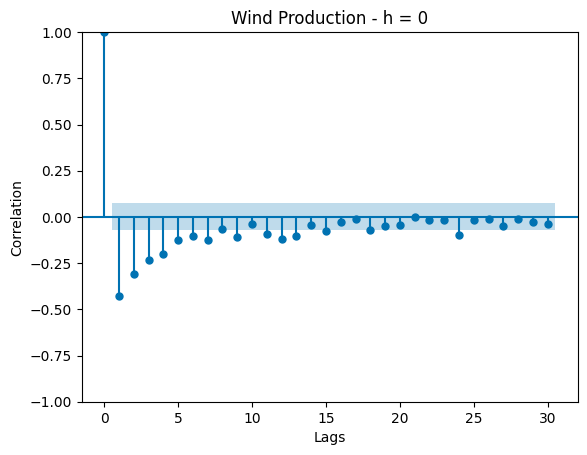

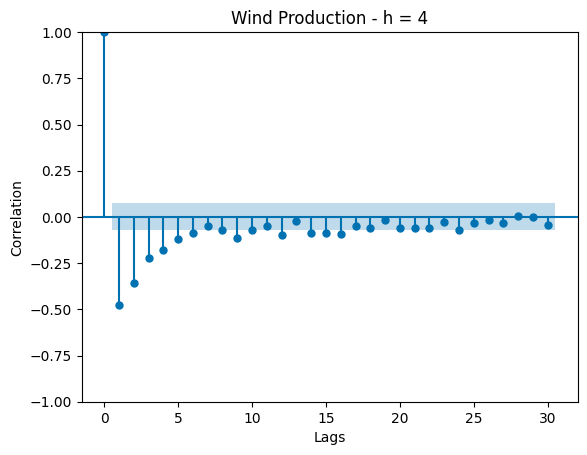

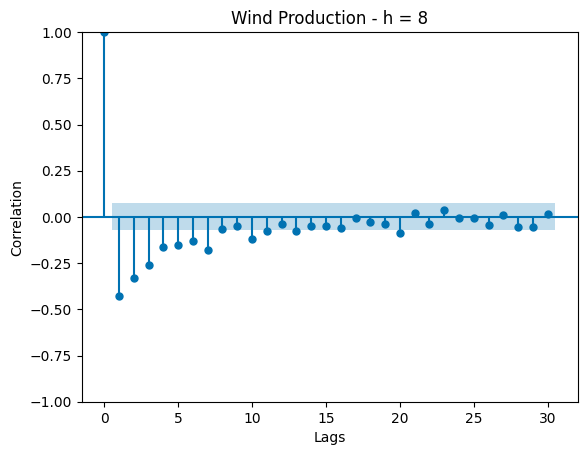

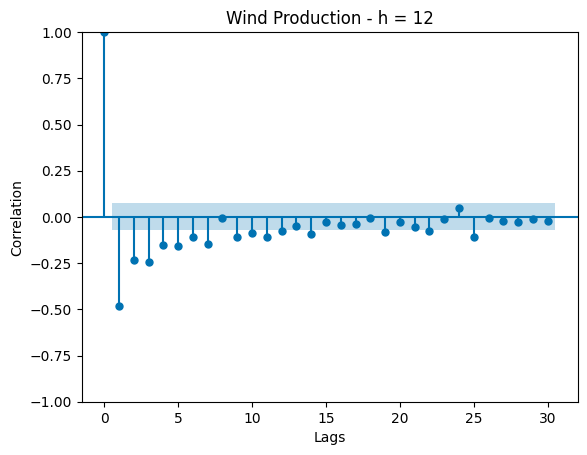

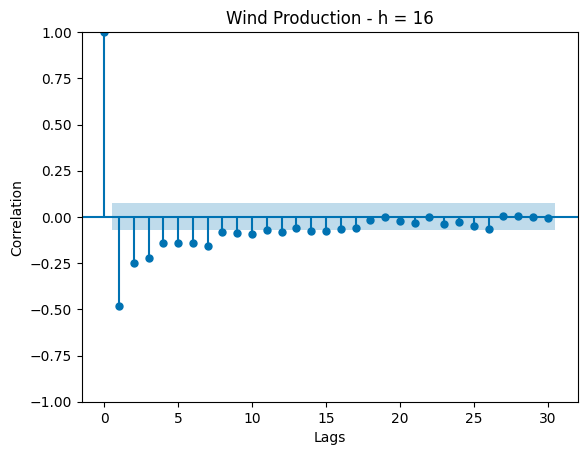

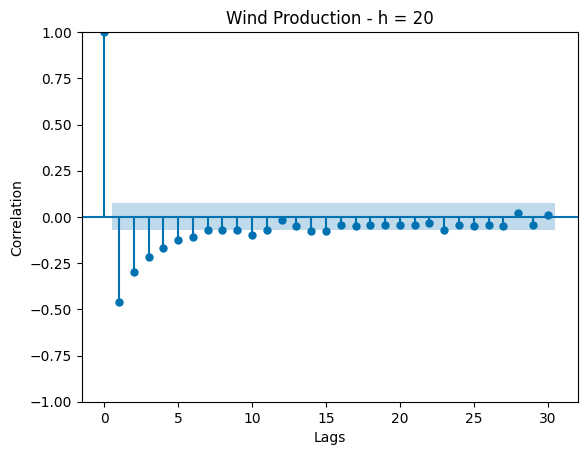

In [40]:
actual = data[data['Source'] == 'Wind']['Production']
hours = range(0, 24, 4)

for hour in hours:
    plot_pacf(actual[actual.index.hour == hour].diff().dropna(), lags=30, alpha=0.01)
    plt.title(f'Wind Production - h = {hour}')
    plt.ylabel('Correlation')
    plt.xlabel('Lags')
    plt.show()


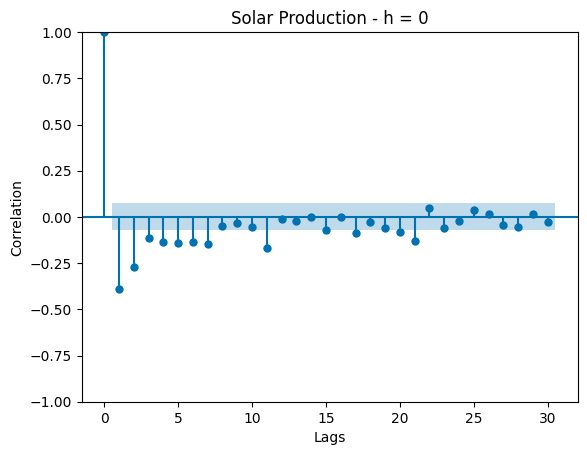

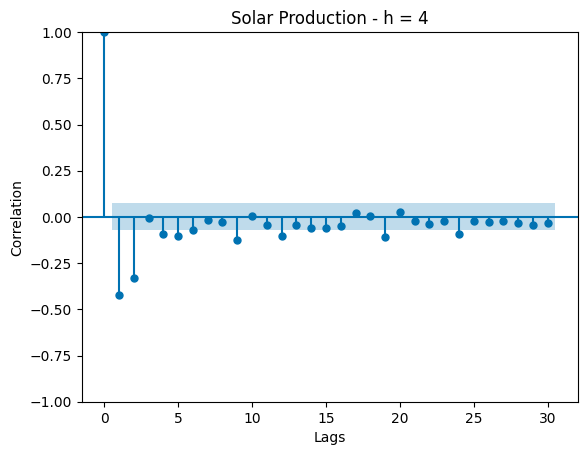

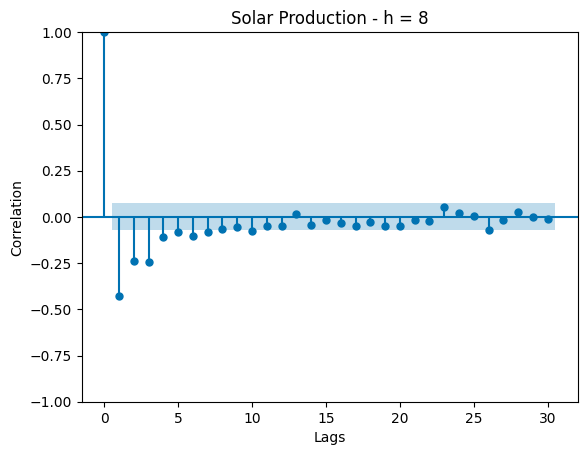

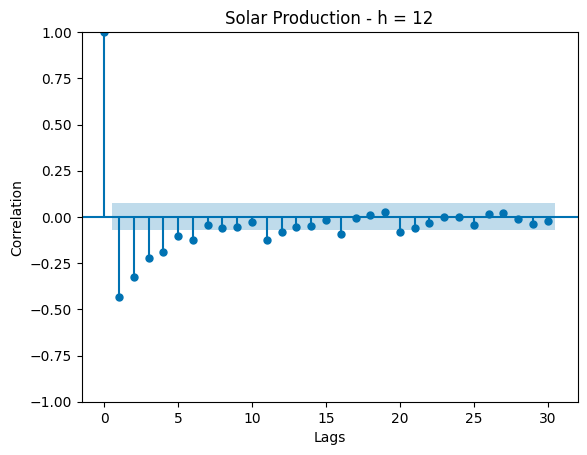

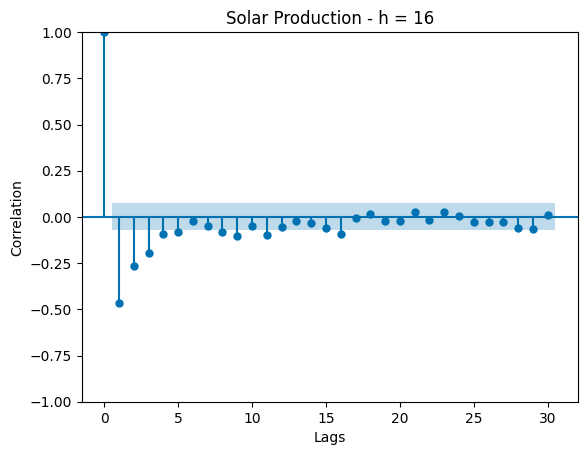

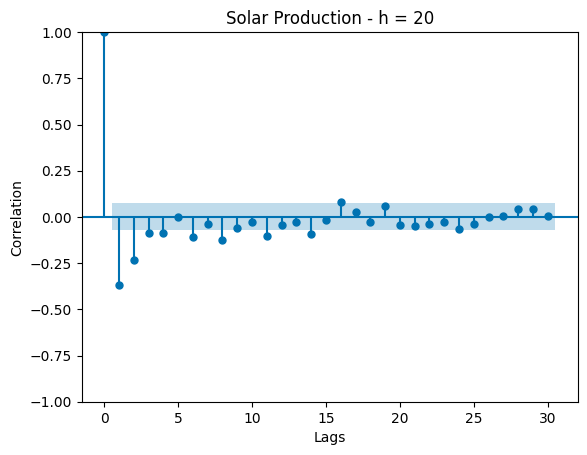

In [42]:
actual = data[data['Source'] == 'Solar']['Production']
hours = range(0, 24, 4)

for hour in hours:
    plot_pacf(actual[actual.index.hour == hour].diff().dropna(), lags=30, alpha=0.01)
    plt.title(f'Solar Production - h = {hour}')
    plt.ylabel('Correlation')
    plt.xlabel('Lags')
    plt.show()
